# Выбор локации для скважины

## Загрузка и подготовка данных

Импортируем все необходимые модели, функции и библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

Определяем константы:

In [2]:
NUM_BOREHOLS = 200   # количество разрабатываемых скважин
SAMPLE_BOREHOLES = 500 # размер выборки для бутстрепа
BUDGET = 10e9  # бюджет компании
PRICE_BARREL = 450 # доход c одного барреля нефти
PROB_LOSS = 0.025 # вероятность убытков

### Загрузка и изучение исходных данных:

In [3]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Посмотрим размер датафреймов, основную информацию и общий вид данных по первым пяти строкам:

In [4]:
data_0.shape, data_1.shape, data_2.shape

((100000, 5), (100000, 5), (100000, 5))

In [5]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [7]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Максимальный объем запасов в 1м регионе - 185, минимальный - 0.

In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Максимальный объем запасов во 2м регионе - 137, минимальный - 0.

In [11]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [13]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Максимальный объем запасов в 3м регионе - 190, минимальный - 0.

В каждом датасете по 100000 объектов, из 5 признаков один (уникальный идентификатор скважины) имеет тип данных 'object', остальные - вещественный тип float64. Признак id - неинформативный (далее - удалим его), признак produc - целевой, f0, f1, f2 - нецелевые признаки.

### Подготовка данных

#### Поиск дубликатов

Проверим данные на дубликаты по id скважины:

In [14]:
data_0.duplicated(subset='id').sum()

10

In [15]:
data_1.duplicated(subset='id').sum()

4

In [16]:
data_2.duplicated(subset='id').sum()

4

По условию дана информация о 100000 разных месторождений в каждом из 3х регионов. Значит в данных есть ошибки.

In [17]:
data_0[data_0.duplicated(subset='id')] #дубликаты в 1 регионе

,id,f0,f1,f2,product
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
66136,74z30,1.084962,-0.312358,6.990771,127.643327
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
75715,Tdehs,0.112079,0.430296,3.218993,60.964018
90815,fiKDv,0.049883,0.841313,6.394613,137.346586
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008
97785,bsk9y,0.378429,0.005837,0.160827,160.637302


Посмотрим на некоторые дубликаты:

In [18]:
data_0.query('id=="HZww2"')

,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695


In [19]:
data_0.query('id=="bxg6G"')

,id,f0,f1,f2,product
1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798


In [20]:
data_1[data_1.duplicated(subset='id')]  #дубликаты во 2 регионе

,id,f0,f1,f2,product
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


Посмотрим на некоторые дубликаты:

In [21]:
data_1.query('id=="LHZR0"')

,id,f0,f1,f2,product
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625


In [22]:
data_1.query('id=="wt4Uk"')

,id,f0,f1,f2,product
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


In [23]:
data_2[data_2.duplicated(subset='id')]  #дубликаты в 3 регионе

,id,f0,f1,f2,product
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


Посмотрим на некоторые дубликаты:

In [24]:
data_2.query('id=="xCHr8"')

,id,f0,f1,f2,product
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


In [25]:
data_2.query('id=="KUPhW"')

,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802


Число полных дубликатов в датасетах:

In [26]:
data_0.duplicated().sum()

0

In [27]:
data_1.duplicated().sum()

0

In [28]:
data_2.duplicated().sum()

0

Видим, что полных дубликатов нет и дубликаты по id скважины отличаются во всех остальных признаках. Поэтому скорее всего это ошибка присвоения идентификатора другой скважиене в результате человеческого фактора (дубликатов немного).

В принципе значения признаков адекватные и данные можно оставить, поскольку для нас не важен признак id при исследовании. Но так как дубликатов крайне малый процент и имеется большой разброс между дубликатами по значению product, а мы не знаем какой из них истинный, то  удалим их все:

In [29]:
data_0 = data_0.drop_duplicates(subset='id', keep=False, ignore_index=True)

In [30]:
data_1 = data_1.drop_duplicates(subset='id', keep=False, ignore_index=True)

In [31]:
data_2 = data_2.drop_duplicates(subset='id', keep=False, ignore_index=True)

#### Удаление неинформативных признаков

Далее удалим уникальный идентификатор скважины, так как это неинформативный признак.

In [32]:
data_0 = data_0.drop(['id'], axis=1)

In [33]:
data_1 = data_1.drop(['id'], axis=1)

In [34]:
data_2 = data_2.drop(['id'], axis=1)

#### Проверка данных на наличие пропусков

In [35]:
data_0.isna().sum()

f0         0
f1         0
f2         0
product    0
dtype: int64

In [36]:
data_1.isna().sum()

f0         0
f1         0
f2         0
product    0
dtype: int64

In [37]:
data_2.isna().sum()

f0         0
f1         0
f2         0
product    0
dtype: int64

Пропусков нет - отлично.

#### Проверка нецелевых признаков на мультиколлинеарность

Все нецелевые признаки являются количественными - используем критерий Пирсона:

<AxesSubplot:>

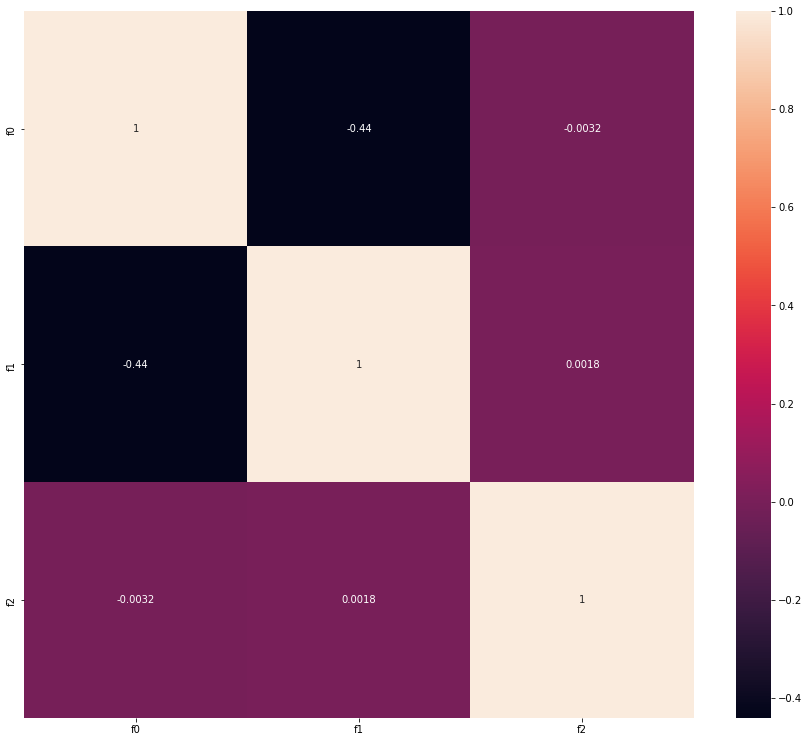

In [38]:
plt.figure(figsize=(15, 13))
sns.heatmap(data_0.drop('product', axis=1).corr(), annot=True)

<AxesSubplot:>

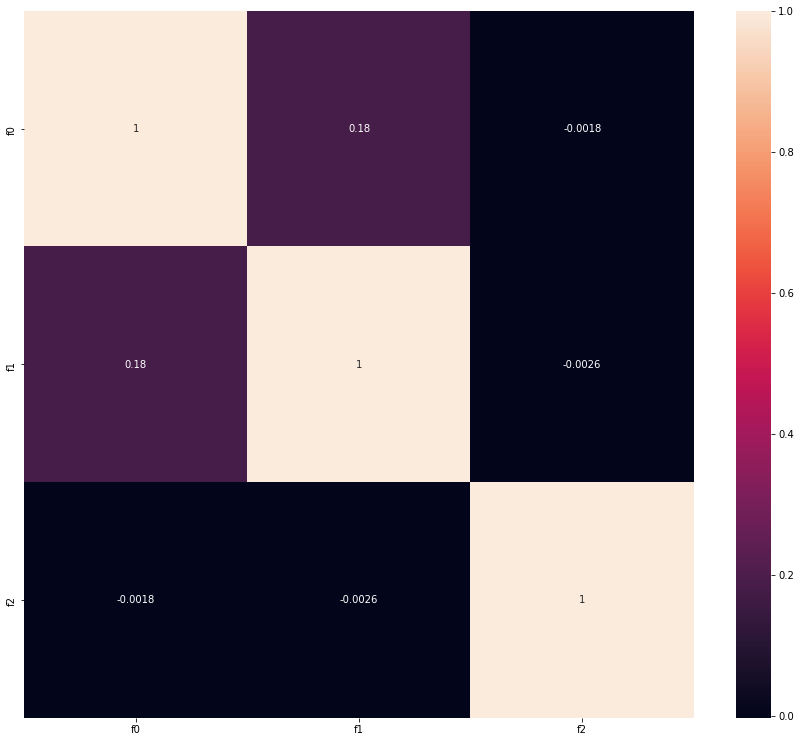

In [39]:
plt.figure(figsize=(15, 13))
sns.heatmap(data_1.drop('product', axis=1).corr(), annot=True)

<AxesSubplot:>

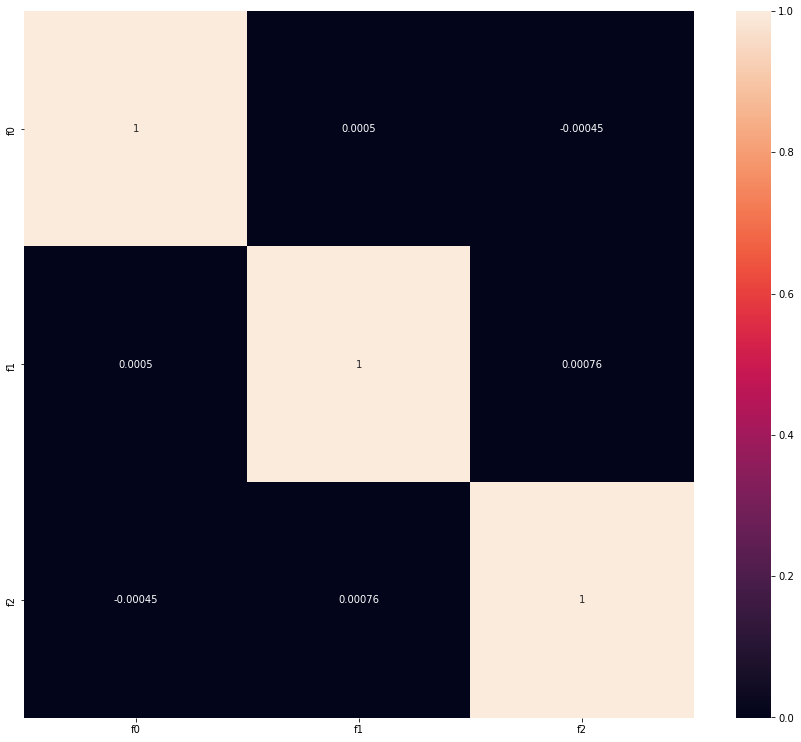

In [40]:
plt.figure(figsize=(15, 13))
sns.heatmap(data_2.drop('product', axis=1).corr(), annot=True)

Коэффициенты корреляции не превышают 0.6 - все в норме.

<AxesSubplot:>

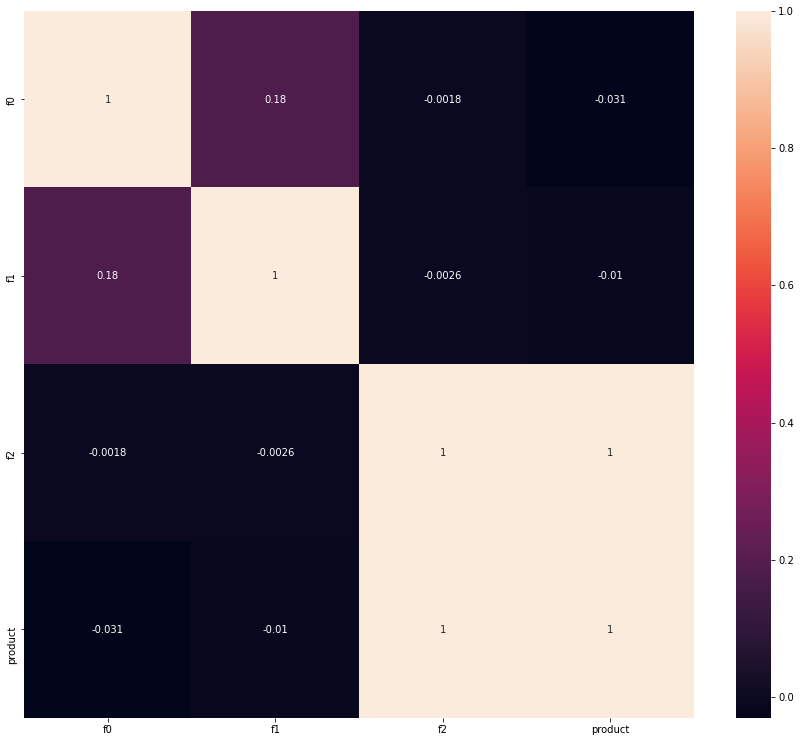

In [41]:
plt.figure(figsize=(15, 13))
sns.heatmap(data_1.corr(), annot=True)

#### Разделение данных по целевому и нецелевому признакам

Разделим датафреймы на столбцы с целевым признаком - 'product' и столбцы с остальными признаками:

In [42]:
features_0 = data_0.drop('product', axis=1)
target_0 = data_0['product']

In [43]:
features_1 = data_1.drop('product', axis=1)
target_1 = data_1['product']

In [44]:
features_2 = data_2.drop('product', axis=1)
target_2 = data_2['product']

### Промежуточные выводы по 1 этапу:

В ходе 1 этапа выполнены следующие задачи:
- загружены и изучены исходные данные:
по условию задачи даны 3 датасета размером в 100000 объектов с 5 признаками, один из которых оказался неиформативным (идентификатор скважины). Целевой признак - product (объём запасов в скважине, тыс. баррелей);

- подготовлены данные:
найдены и удалены дубликаты (10, 4 и 4 дубликата - в 1, 2 и 3 датасетах соответственно),
удален неинформативный признак id скважины, проверено наличие пропусков - пропусков не найдено, нецелевые признаки проверены на мультиколлинеарность - коэффициентов со значением 0.6 и более не обнаружено, данные датасетов разделены по целевому и нецелевому признакам.


## Обучение и проверка модели

###  Разбиение данных на обучающую и валидационную выборки в соотношении 75:25.

Разделим обработанные датасеты на обучающую и валидационную выборки в соотношении 3:1.

In [45]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

In [46]:
len(features_train_2)/len(features_valid_2)

3.0

Смотрим размер полученных выборок:

In [47]:
features_train_0.shape[0] #смотрим размер полученных выборок

74985

In [48]:
features_valid_0.shape[0] #смотрим размер полученных выборок

24995

In [49]:
features_train_1.shape[0] #смотрим размер полученных выборок

74994

In [50]:
features_valid_1.shape[0] #смотрим размер полученных выборок

24998

In [51]:
features_train_2.shape[0] #смотрим размер полученных выборок

74994

In [52]:
features_valid_2.shape[0] #смотрим размер полученных выборок

24998

### Масштабирование числовых признаков

Все нецелевые признаки - числовые, но имеют различный диапазон изменения (см. пукнт 1.1), поэтому масштабируем их.

Создадим объект структуры StandardScaler() и настроим его для всех датасетов:

In [53]:
scaler_0 = StandardScaler()
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()

# обучаем модель на трейнах по каждому региону
scaler_0.fit(features_train_0)
scaler_1.fit(features_train_1)
scaler_2.fit(features_train_2)

StandardScaler()

Преобразуем столбцы функцией transform() и преобразуем массивы numpy в датафреймы с исходными названиями признаков:

In [54]:
# масштабируем трейн 

features_train_0 = pd.DataFrame(
    scaler_0.transform(features_train_0), columns=features_0.columns)

features_train_1 = pd.DataFrame(
    scaler_1.transform(features_train_1), columns=features_1.columns)

features_train_2 = pd.DataFrame(
    scaler_2.transform(features_train_2), columns=features_2.columns)

# масштабируем валид

features_valid_0 = pd.DataFrame(
    scaler_0.transform(features_valid_0), columns=features_0.columns)

features_valid_1 = pd.DataFrame(
    scaler_1.transform(features_valid_1), columns=features_1.columns)

features_valid_2 = pd.DataFrame(
    scaler_2.transform(features_valid_2), columns=features_2.columns)

In [55]:
features_train_0.describe() # наблюдаем, что std признаков выравнялось

,f0,f1,f2
count,7.498500e+04,7.498500e+04,7.498500e+04
mean,-2.515824e-17,-4.927415e-18,-3.899291e-17
std,1.000007e+00,1.000007e+00,1.000007e+00
min,-2.190786e+00,-2.177497e+00,-4.495803e+00
25%,-6.570672e-01,-8.907212e-01,-6.836842e-01
50%,1.425555e-03,1.081909e-03,3.204443e-03
75%,6.580222e-01,8.904933e-01,6.801353e-01
max,2.135624e+00,2.168314e+00,4.157751e+00


In [56]:
features_valid_2.describe() # наблюдаем, что std признаков выравнялось

,f0,f1,f2
count,24998.000000,24998.000000,24998.000000
mean,-0.005731,0.008511,-0.001590
std,1.009873,1.006335,1.003402
min,-5.072680,-3.902740,-4.168465
25%,-0.680303,-0.669447,-0.686729
50%,0.004137,0.010394,-0.006612
75%,0.667719,0.681157,0.675862
max,4.161515,3.940884,3.955206


### Обучение модели

По условию задачи используем только линейную регрессию.

In [57]:
# инициализируем модели LinearRegression
model_0 = LinearRegression() 
model_1 = LinearRegression()
model_2 = LinearRegression()

# обучаем модели на тренировочных выборках
model_0.fit(features_train_0, target_train_0) 
model_1.fit(features_train_1, target_train_1) 
model_2.fit(features_train_2, target_train_2) 

LinearRegression()

### Сохранение предсказаний и правильных ответов на валидационной выборке

Правильные ответы на валидационной выборке записаны в переменных: target_valid_0, target_valid_1 и target_valid_2.

In [58]:
# получаем предсказания моделей на валидационных выборках
predictions_valid_0 = pd.Series(model_0.predict(features_valid_0))
predictions_valid_1 = pd.Series(model_1.predict(features_valid_1))
predictions_valid_2 = pd.Series(model_2.predict(features_valid_2))

# правильные ответы на валидационной выборке
#заранее сбрасываем индексы во избежание дублей индексов при бутстрепе
target_valid_0 = target_valid_0.reset_index(drop=True) 
target_valid_1 = target_valid_1.reset_index(drop=True)
target_valid_2 = target_valid_2.reset_index(drop=True)

###  Cредний запас предсказанного сырья и RMSE модели.

In [59]:
# посчитаем значение метрики RMSE на валидационных выборках
result_0 = mean_squared_error(target_valid_0, predictions_valid_0) ** 0.5
result_1 = mean_squared_error(target_valid_1, predictions_valid_1) ** 0.5
result_2 = mean_squared_error(target_valid_2, predictions_valid_2) ** 0.5

display('Cредний запас предсказанного сырья 1-го региона:', predictions_valid_0.mean())
display('RMSE 1-го региона:', result_0)
display('Cредний запас предсказанного сырья 2-го региона:', predictions_valid_1.mean())
display('RMSE 2-го региона:', result_1)
display('Cредний запас предсказанного сырья 3-го региона:', predictions_valid_2.mean())
display('RMSE 3-го региона:', result_2)

'Cредний запас предсказанного сырья 1-го региона:'

92.42384109947359

'RMSE 1-го региона:'

37.716904960382735

'Cредний запас предсказанного сырья 2-го региона:'

68.98311857983121

'RMSE 2-го региона:'

0.891490139034854

'Cредний запас предсказанного сырья 3-го региона:'

95.11622302076478

'RMSE 3-го региона:'

39.975543264382345

Анализируя вышеприведенные результаты можно сказать, что наибольший средний запас сырья находится в 3 регионе: 95 тыс баррелей на скважину. Меньше всего средний запас во 2 регионе. В то же время, качество предсказания модели для 2 региона наилучшее. 

Качество предсказания модели для 2 региона лучше скорее всего обусловлено ограниченным числом значений целевого признака: 12 против 99 тыс в остальных:

In [60]:
target_0.nunique()

99980

In [61]:
target_1.nunique()

12

In [62]:
target_2.nunique()

99992

### Промежуточные выводы по 2 этапу:

В ходе 2 этапа выполнены следующие задачи:
- каждый из 3х обработанных датасетов разделен на обучающую и валидационную выборки в соотношщении 3:1;
- сделано масшабирование числовых признаков;
- обучена модель линейной регрессии на каждой из 3х полученных обучающих выборках;
- получены предсказания объема запасов сырья в скважинах по каждому региону;
- рассчитан средний запас сырья предсказанного сырья по регионам и метрика RMSE моделей: наибольший средний запас сырья находится в 3 регионе: 95 тыс баррелей на скважину. Меньше всего средний запас во 2 регионе. В то же время, качество предсказания модели для 2 региона наилучшее, что скорее всего обусловлено ограниченным числом значений целевого признака по сравнению с другими регионами.

## Подготовка к расчёту прибыли

### Расчет достаточного объёма сырья для безубыточной разработки новой скважины

Посчитаем бюджет на разработку одной скважины:

In [64]:
budget_borehole = BUDGET / NUM_BOREHOLS # бюджет на одну скважину
budget_borehole

50000000.0

Одна скважина окупится, если объем запасов сырья в ней будет больше или равен отношению вложений к цене барреля. Найдем это отношение:

In [65]:
reserve = budget_borehole / PRICE_BARREL
reserve

111111.11111111111

Или в переводе к тысячам баррелей:

In [66]:
reserve = budget_borehole / (PRICE_BARREL * 1000)
reserve

111.11111111111111

Сравним полученный объём сырья со средним запасом в каждом регионе:
1 регоин - 92 тыс. баррелей, 2 регион - 69 тыс. баррелей, 3 регион - 95 тыс. баррелей.
Все средние предсказанные значения ниже объёма сырья, достаточного для безубыточной разработки новой скважины. То есть на данный момент можно судить об убыточности скважин регионов.
Но стоит отметить, что это усредненные показатели и для разработки по условию задачи из 500 скважин выбираются 200 лучших.

### Промежуточные выводы по 3 этапу:

В ходе 3 этапа выполнены следующие задачи:
- введены необходимые переменные для расчета в соответствии с исходными данными;
- рассчитан достаточный объёма сырья для безубыточной разработки новой скважины: 111 тыс бареллей, что больше предсказанных средних значений запаса сырья на скважину по всем трем регионам. В то же время планируется выбор только 200 лучших скважин, в связи с чем результаты еще могут сильно отличаться от среднего предсказанного на данный момент.

## Функция для расчёта прибыли 

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

### Выбор скважин с максимальными значениями предсказаний

In [67]:
#выбор 200 скважин с наибольшим запасом сырья

filter_pred_0 = predictions_valid_0.sort_values(ascending=False)[0:200] 
filter_pred_1 = predictions_valid_1.sort_values(ascending=False)[0:200] 
filter_pred_2 = predictions_valid_2.sort_values(ascending=False)[0:200] 

### Cуммирование целевых значений объёма сырья, соответствующих отфильтрованным предсказаниям

In [68]:
# суммируем целевой признак по индексам отфильтрованных предсказанных значений

target_sum_0 = target_valid_0[filter_pred_0.index].sum()
target_sum_1 = target_valid_1[filter_pred_1.index].sum()
target_sum_2 = target_valid_2[filter_pred_2.index].sum()

### Расчет прибыли для полученного объёма сырья

Здесь и далее под прибылью будем считать разность выручки и вложений на разработку.


Умножим полученный суммарный запас на стоимость тысячи баррелей и вычтем бюджет:

In [69]:
revenue_0 = target_sum_0 * PRICE_BARREL * 1000 - BUDGET
revenue_1 = target_sum_1 * PRICE_BARREL * 1000 - BUDGET
revenue_2 = target_sum_2 * PRICE_BARREL * 1000 - BUDGET

In [70]:
revenue_0, revenue_1, revenue_2

(3136026056.655861, 2415086696.681513, 2465945792.0122643)

Функция будет иметь вид (без локальных переменных):

In [71]:
def revenue(predictions, target):
    
    '''''predictions - предсказания модели
         target      - значения целевого признака'''''
    
    # 4.1  Выбор скважин с максимальными значениями предсказаний
    filter_pred = predictions.sort_values(ascending=False)[:NUM_BOREHOLS]
    # 4.2  Cуммирование целевых значений объёма сырья, соответствующих отфильтрованным предсказаниям
    target_sum = target[filter_pred.index].sum()
    # 4.3  Расчет прибыли для полученного объёма сырья
    profit = target_sum * PRICE_BARREL * 1000 - BUDGET
    
    return profit

In [72]:
revenue(predictions_valid_0, target_valid_0) #Расчет прибыли для полученного объёма сырья в 1 регионе

3136026056.655861

In [73]:
revenue(predictions_valid_1, target_valid_1) #Расчет прибыли для полученного объёма сырья во 2 регионе

2415086696.681513

In [74]:
revenue(predictions_valid_2, target_valid_2) #Расчет прибыли для полученного объёма сырья в 3 регионе

2465945792.0122643

### Промежуточные выводы по 4 этапу:

В ходе 4 этапа выполнены следующие задачи:
- выбраны 200 скважин в каждом из регионов с наилучшим предсказанным показателем запасом сырья;
- просуммирован целевой показатель объектов, соответствующих лучшим предсказанным показателям запасов сырья;
- написана функция расчета прибыли revenue;
- рассчитана прибыль для полученного объёма сырья по каждому региону:
1 регион - 3,136 млрд руб, 2 регион - 2,415 млрд руб, 3 регион - 2,466 млрд руб.

## Расчёт прибыли и рисков для каждого региона

### Найдем распределение прибыли с помощью техники Bootstrep с 1000 выборками

Напишем функцию для получения распределений прибыли:

In [75]:
def bootstrep_1000(predictions,target):
    
    state = np.random.RandomState(12345)
    values = []

    for i in range(1000):
    
        target_subsample = target.sample(
            n=500, replace=True, random_state=state)
        predict_subsample = predictions[target_subsample.index]
        values.append(revenue(predict_subsample,target_subsample))
    
    return pd.Series(values)

Распределения прибыли для регионов:

In [77]:
distrib_revenue_0 = bootstrep_1000(predictions_valid_0, target_valid_0)
distrib_revenue_1 = bootstrep_1000(predictions_valid_1, target_valid_1)
distrib_revenue_2 = bootstrep_1000(predictions_valid_2, target_valid_2)

display('Регион_1')
display(distrib_revenue_0)
display('Регион_2')
display(distrib_revenue_1)
display('Регион_3')
distrib_revenue_2

'Регион_1'

0      4.809266e+08
1      3.680181e+08
2      4.660728e+08
3      6.260369e+08
4      6.721933e+08
           ...     
995    6.055913e+08
996    8.677808e+08
997    1.077275e+09
998    6.608107e+08
999    1.331672e+08
Length: 1000, dtype: float64

'Регион_2'

0      1.174760e+09
1      9.907105e+08
2      7.345716e+08
3      3.172107e+08
4      4.727103e+08
           ...     
995    5.341015e+08
996    7.944700e+08
997    8.607751e+08
998    5.418765e+08
999    6.083059e+08
Length: 1000, dtype: float64

'Регион_3'

0      3.646140e+08
1      9.103822e+08
2      2.105464e+08
3      1.101617e+09
4      6.812452e+08
           ...     
995    3.918546e+08
996    6.166440e+08
997   -8.576603e+06
998    4.028616e+08
999    8.736780e+08
Length: 1000, dtype: float64

### Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков

Средняя прибыль:

In [78]:
# Регион_1
display('Регион_1')
display(distrib_revenue_0.mean())

# Регион_2
display('Регион_2')
display(distrib_revenue_1.mean())

# Регион_3
display('Регион_3')
distrib_revenue_2.mean()

'Регион_1'

632921098.4851676

'Регион_2'

683650778.237223

'Регион_3'

529036466.741624

95%-й доверительный интервал:

In [79]:
# Регион_1
lower = distrib_revenue_0.quantile(q=.025)
upper = distrib_revenue_0.quantile(q=.975)
display('Регион_1',lower, upper)

# Регион_2
lower = distrib_revenue_1.quantile(q=.025)
upper = distrib_revenue_1.quantile(q=.975)
display('Регион_2',lower, upper)

# Регион_3
lower = distrib_revenue_2.quantile(q=.025)
upper = distrib_revenue_2.quantile(q=.975)
display('Регион_3',lower, upper)

'Регион_1'

54999819.21786862

1284909854.6222572

'Регион_2'

176104182.72476843

1200084485.9101088

'Регион_3'

-63569130.93939247

1164473364.1825826

Риск убытков:

Риск убытков считаем как вероятность получить убыток или отрицательный результат на выборке в 1000 значений из бутстрепа, умноженную на проценты:

In [80]:
# Риск для региона_1
distrib_revenue_0[distrib_revenue_0 < 0].count() * 100 / 1000

2.0

In [81]:
# Риск для региона_2
distrib_revenue_1[distrib_revenue_1 < 0].count() * 100 / 1000

0.7

In [82]:
# Риск для региона_3
distrib_revenue_2[distrib_revenue_2 < 0].count() * 100/ 1000

4.4

По условию проекта после оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Таким образом, регионы с риском менее 2.5 % - регион_1 (2 %) и регион_2 (0.7 %).
Из них большая средняя прибыль соответствует региону_2: 6.836 млрд руб. Выбираем регион_2.

###  Промежуточные выводы по 5 этапу

 В ходе 5 этапа выполнены следующие задачи:
 
- применена техника Bootstrap с 1000 выбороками, чтобы найти распределение прибыли для каждого из регионов, при этом из валидационной выборки, которая в данном случае является тестовой выборкой (гиперпараметры модели не настраивали), формировали случайную выборку 500 значений из которых выбирали 200 лучших;
- с использованием полученных распределений прибыли найдены:

    средняя прибыль: 'Регион_1' - 6.329 млрд руб, 'Регион_2' - 6.836 млрд руб, 'Регион_3' - 5.290 млрд руб.;

    95%-й доверительный интервал: 'Регион_1' - (54.999.819, 1.284.909.854), 'Регион_2' - (176.104.182, 1.200.084.485), 'Регион_3' - (-63.569.130, 1.164.473.364);

    риск убытков: 'Регион_1' - 2 %, 'Регион_2' - 0.7 %, 'Регион_3' - 4.4 %;


- предложен регион для разработки скважин - это регион_2; выбор сделан с учетом требований: риск убытков менее 2.5 % и максимальная средняя прибыль (683.650.778 руб). 

## Общий вывод по проекту

**Целью настоящего проекта** являлся выбор локации для скважины с допустимым риском убытков (менее 2.5 %) и максимальной возможной средней прибылью.

**Для этого на первом этапе проведена загрузка и подготовка данных:**
- по условию даны 3 датасета размером в 100000 объектов с 5 признаками, один из которых оказался неиформативным (идентификатор скважины). Целевой признак - product (объём запасов в скважине, тыс. баррелей),
- подготовлены данные: найдены и удалены дубликаты (10, 4 и 4 дубликата - в 1, 2 и 3 датасетах соответственно), удален неинформативный признак id скважины, проверено наличие пропусков - пропусков не найдено, нецелевые признаки проверены на мультиколлинеарность - коэффициентов со значением 0.6 и более не обнаружено, данные датасетов разделены по целевому и нецелевому признакам.

**На втором этапе обучена и проверена модель линейной регрессии:**
- каждый из 3х обработанных датасетов разделен на обучающую и валидационную выборки в соотношщении 3:1;
- проведено масштабирование нецелевых признаков;
- обучена модель линейной регрессии на каждой из 3х полученных обучающих выборках;
- получены предсказания объема запасов сырья в скважинах по каждому региону;
- рассчитан средний запас сырья предсказанного сырья по регионам и метрика RMSE моделей: наибольший средний запас сырья находится в 3 регионе: 95 тыс баррелей на скважину. Меньше всего средний запас во 2 регионе. В то же время, качество предсказания модели для 2 региона наилучшее, что скорее всего обусловлено ограниченным числом значений целевого признака по сравнению с другими регионами.

**На третьем этапе проведена подготовка к расчету прибыли:**
- введены необходимые переменные для расчета в соответствии с исходными данными;
- рассчитан достаточный объёма сырья для безубыточной разработки новой скважины: 111 тыс бареллей, что больше предсказанных средних значений запаса сырья на скважину по всем трем регионам.

**На четвертом этапе:**
- выбраны 200 скважин в каждом из регионов с наилучшим предсказанным показателем запасом сырья;
- просуммирован целевой показатель объектов, соответствующих лучшим предсказанным показателям запасов сырья;
- написана функция расчета прибыли;
- рассчитана прибыль для полученного объёма сырья по каждому региону: 1 регион - 3,136 млрд руб, 2 регион - 2,415 млрд руб, 3 регион - 2,466 млрд руб.

**На пятом этапе проведен расчёт прибыли и рисков для каждого региона:**
- применена техника Bootstrap для получения распределений прибыли регионов,
- на основе распределений прибыли регионов рассчитаны: средняя прибыль: 'Регион_1' - 6.329 млрд руб, 'Регион_2' - 6.836 млрд руб, 'Регион_3' - 5.290 млрд руб.; 95%-й доверительный интервал: 'Регион_1' - (54.999.819, 1.284.909.854), 'Регион_2' - (176.104.182, 1.200.084.485), 'Регион_3' - (-63.569.130, 1.164.473.364); риск убытков: 'Регион_1' - 2 %, 'Регион_2' - 0.7 %, 'Регион_3' - 4.4 %.

По итогам расчетов для разработки скважин предложен регион_2; выбор сделан с учетом требований: риск убытков менее 2.5 % (0.7 %) и максимальная средняя прибыль (683.650.778 руб). 
    
   Проект наглядно демонстрирует, что несмотря на низкий предсказанный средний запас сырья по всем скважинам из валидационной выборки (при котором скважина не окупается), использование техники Bootstrap позволяет на основе расчета среднего от прибыли по случайно генерируемым выборкам из общей валидационной выборки оценить по имеющимся данным среднюю прибыль от ограниченного числа потенциальных разрабатываемых скважин, рассчитать доверительный интервал для полученных значений прибыли и оценить риск убытков. Так, в итоге, регион_3 при наибольшем среднем запасе предсказанного сырья оказался худшим с точки зрения рисков убытков и средней прибыли.

## Вывод для начальства

По имеющимся данным о добыче сырья в 3 регионах выбрана локация для 200 скважин с допустимым риском убытков (менее 2.5 %) и максимальной возможной средней прибылью.
Подходящим для добычи является регион_2, средняя прибыль по которому составляет 683.650.778 руб. С 95 % вероятностью значение прибыли будет в интервале от 176.104.182 до 1.200.084.485 руб. Риск убытков составляет 0.7 %.